In [4]:
# Import Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px 

# Libraries for Sentiment Analysis 
import re 
import nltk 
from nltk.corpus import stopwords 
from nltk.corpus import wordnet 
from nltk.stem import WordNetLemmatizer 
from textblob import TextBlob 
from wordcloud import WordCloud 

In [30]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

**TextBlob:** Used for tokenization as well as for finding the polarity and subjectivity of a text

**Regular expression (re):** removes unnecessary symbols that do not provide any meaning such as @, comma, hashtags, *, etc.

**Natural Language Toolkit (nltk):** removes stop words such as and, is, the, in, or, etc.

### Reading datasets

In [7]:
# reading datasets 
trump = pd.read_csv("input/hashtag_donaldtrump.csv", lineterminator='\n') 

In [8]:
trump.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


In [9]:
# Display all the columns in the DataFrame 
print(trump.columns)

Index(['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
       'user_id', 'user_name', 'user_screen_name', 'user_description',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'continent', 'state', 'state_code',
       'collected_at'],
      dtype='object')


In [10]:
biden = pd.read_csv("input/hashtag_joebiden.csv", lineterminator='\n') 


In [11]:
biden.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:18,1.316529e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,8.099044e+08,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,...,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566
3,2020-10-15 00:00:21,1.316529e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,NaN,...,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849
4,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132


In [12]:
print(trump.shape)
print(biden.shape)

(970919, 21)
(776886, 21)


In [13]:
trump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970919 entries, 0 to 970918
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            970919 non-null  object 
 1   tweet_id              970919 non-null  float64
 2   tweet                 970919 non-null  object 
 3   likes                 970919 non-null  float64
 4   retweet_count         970919 non-null  float64
 5   source                970043 non-null  object 
 6   user_id               970919 non-null  float64
 7   user_name             970897 non-null  object 
 8   user_screen_name      970919 non-null  object 
 9   user_description      869651 non-null  object 
 10  user_join_date        970919 non-null  object 
 11  user_followers_count  970919 non-null  float64
 12  user_location         675957 non-null  object 
 13  lat                   445719 non-null  float64
 14  long                  445719 non-null  float64
 15  

In [14]:
biden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776886 entries, 0 to 776885
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            776886 non-null  object 
 1   tweet_id              776886 non-null  float64
 2   tweet                 776886 non-null  object 
 3   likes                 776886 non-null  float64
 4   retweet_count         776886 non-null  float64
 5   source                776173 non-null  object 
 6   user_id               776886 non-null  float64
 7   user_name             776861 non-null  object 
 8   user_screen_name      776886 non-null  object 
 9   user_description      694877 non-null  object 
 10  user_join_date        776886 non-null  object 
 11  user_followers_count  776886 non-null  float64
 12  user_location         543092 non-null  object 
 13  lat                   355293 non-null  float64
 14  long                  355293 non-null  float64
 15  

### Data Preprocessing

In [15]:
# creating a new column 'candidate' to differentiate 
# between tweets of Trump and Biden upon concatination 
trump['candidate'] = 'trump'

# biden dataframe 
biden['candidate'] = 'biden'

# combining the dataframes 
data = pd.concat([trump, biden]) 

# FInal data shape 
print('Final Data Shape :', data.shape) 

# View the first 2 rows 
print("\nFirst 2 rows:") 
print(data.head(3)) 

Final Data Shape : (1747805, 22)

First 2 rows:
            created_at      tweet_id  \
0  2020-10-15 00:00:01  1.316529e+18   
1  2020-10-15 00:00:01  1.316529e+18   
2  2020-10-15 00:00:02  1.316529e+18   

                                               tweet  likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...    0.0            0.0   
1  Usa 2020, Trump contro Facebook e Twitter: cop...   26.0            9.0   
2  #Trump: As a student I used to hear for years,...    2.0            1.0   

             source      user_id           user_name user_screen_name  \
0         TweetDeck  360666534.0  El Sol Latino News  elsollatinonews   
1  Social Mediaset   331617619.0             Tgcom24  MediasetTgcom24   
2   Twitter Web App    8436472.0              snarke           snarke   

                                    user_description  ...  \
0  🌐 Noticias de interés para latinos de la costa...  ...   
1  Profilo ufficiale di Tgcom24: tutte le notizie...  ...   
2 

In [16]:
data[data['candidate'] == 'trump'].head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,candidate
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,trump
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,trump
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,trump
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591,trump
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,trump


In [17]:
data[data['candidate'] == 'biden'].head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,candidate
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,biden
1,2020-10-15 00:00:18,1.316529e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,8.099044e+08,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283,biden
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,...,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566,biden
3,2020-10-15 00:00:21,1.316529e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849,biden
4,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132,biden


### Data Cleaning

In [18]:
# dropping null values if they exist 
data.dropna(inplace=True) 

In [19]:
data['country'].value_counts()

country
United States of America    182382
United Kingdom               31869
India                        20931
France                       19996
Germany                      18534
Canada                       16250
The Netherlands               8491
Australia                     8330
Spain                         5254
Brazil                        4211
Pakistan                      3704
Italy                         2966
Ireland                       2587
Bangladesh                    2036
Mexico                        1972
Belgium                       1962
Nigeria                       1848
South Africa                  1648
United Arab Emirates          1521
Switzerland                   1494
Peru                          1031
Lebanon                       1002
Argentina                      872
Ecuador                        824
Colombia                       565
Honduras                       508
Venezuela                      431
New Zealand                    384
Poland      

**NOTE:** While exploring the data is that “United States of America” and “US” in the country column are treated as different nations in the dataset which is a major problem. Therefore, we can assign a common term “US” to treat it as one country.

In [20]:
# Shorten any United States (/of America) to simply "US"
data['country'] = data['country'].replace({'United States of America': "US",'United States': "US"}) 

In [21]:
data['country'].value_counts()

country
US                      182382
United Kingdom           31869
India                    20931
France                   19996
Germany                  18534
Canada                   16250
The Netherlands           8491
Australia                 8330
Spain                     5254
Brazil                    4211
Pakistan                  3704
Italy                     2966
Ireland                   2587
Bangladesh                2036
Mexico                    1972
Belgium                   1962
Nigeria                   1848
South Africa              1648
United Arab Emirates      1521
Switzerland               1494
Peru                      1031
Lebanon                   1002
Argentina                  872
Ecuador                    824
Colombia                   565
Honduras                   508
Venezuela                  431
New Zealand                384
Poland                     340
Uruguay                    237
Lithuania                  198
Bolivia                    194


### Exploratory Data Analysis

In [22]:
# Group the data by 'candidate' and count the 
# number of tweets for each candidate 
tweets_count = data.groupby('candidate')['tweet'].count().reset_index() 

# Interactive bar chart 
candidate_bar = px.bar(tweets_count, x='candidate', y='tweet', color='candidate', 
color_discrete_map={'Trump': 'pink', 'Biden': 'blue'}, 
labels={'candidate': 'Candidates', 'tweet': 'Number of Tweets'}, 
title='Tweets for Candidates') 

# Show the chart 
candidate_bar.show() 

**Interpretation:** Upon studying the graph, we can say that Donald Trump is the most tweeted about by the general public as compared to Joe Biden.

### Top10 Country-wise tweets Counts
So, let’s find out the top 10 countries that are most active in tweeting during the elections.

In [23]:
# Top10 Countrywise tweets Counts 
top10countries = data.groupby('country')['tweet'].count( 
).sort_values(ascending=False).reset_index().head(10) 
# top10countries 

# Interactive bar chart 
top10_bar = px.bar(top10countries, x='country', y='tweet', 
template='plotly_dark', 
color_discrete_sequence=px.colors.qualitative.Dark24_r, 
title='Top10 Countrywise tweets Counts') 

# To view the graph 
top10_bar.show() 



**Tweet Counts for Each Candidate in the Top 10 Countries Now:** let us find out the number of tweets done for each candidate by all the countries.

In [24]:
# the number of tweets done for each 
# candidate by all the countries. 
tweet_df = data.groupby(['country', 'candidate'])[ 
'tweet'].count().reset_index() 

# Candidate for top 10 country tweet 
tweeters = tweet_df[tweet_df['country'].isin(top10countries.country)] 

# Plot for tweet counts for each candidate 
# in the top 10 countries 
top10_bycandidate_bar = px.bar(tweeters, x='country', y='tweet', color='candidate', 
labels={'country': 'Country', 'tweet': 'Number of Tweets', 
'candidate': 'Candidate'}, 
title='Tweet Counts for Each Candidate in the Top 10 Countries', 
template='plotly_dark', 
barmode='group') 

# Show the chart 
top10_bycandidate_bar.show() 


**Interpretation:** All the countries are tweeting the most about Trump. However, India is talking more about Joe Biden.

### Sentiment Analysis for prediction of election results ###
We shall only take into account US citizens’ opinions here, as they are a crucial deciding factor in who becomes the US president.

In [25]:
# Clean up text for appropriate parsing

def clean(text): 
	# Remove URLs 
	text = re.sub(r'https?://\S+|www\.\S+', '', str(text)) 

	# Convert text to lowercase 
	text = text.lower() 

	# Replace anything other than alphabets a-z with a space 
	text = re.sub('[^a-z]', ' ', text) 

	# Split the text into single words 
	text = text.split() 

	# Initialize WordNetLemmatizer 
	lm = WordNetLemmatizer() 

	# Lemmatize words and remove stopwords 
	text = [lm.lemmatize(word) for word in text if word not in set( 
		stopwords.words('english'))] 

	# Join the words back into a sentence 
	text = ' '.join(word for word in text) 

	return text 

**Get polarity, subjectivity, and Analysis:** Let’s create functions to get polarity, subjectivity, and Analysis to fetch sentiments from the data.

In [26]:
# Positive or negative sentiment
def getpolarity(text): 
    return TextBlob(text).sentiment.polarity 

# Opinion-based or fact-based
def getsubjectivity(text): 
    return TextBlob(text).sentiment.subjectivity 

def getAnalysis(score): 
    if score < 0: 
        return 'negative'
    elif score == 0: 
        return 'neutral'
    else: 
        return 'positive'


### Donald Trump tweet sentiment analysis ###

Note: We are considering the data of only the US because that will be a major factor in predicting the results.

In [35]:
trump_tweets = data[data['candidate'] == 'trump'] 

# Taking only U.S. country data 
trump_tweets = trump_tweets.loc[trump_tweets.country == 'US'] 
trump_tweets = trump_tweets[['tweet']] 
print(trump_tweets.head()) 

                                                tweet
2   #Trump: As a student I used to hear for years,...
4   You get a tie! And you get a tie! #Trump ‘s ra...
11  In 2020, #NYPost is being #censorship #CENSORE...
12  #Trump #PresidentTrump #Trump2020LandslideVict...
22  #Trump: Nobody likes to tell you this, but som...


In [40]:
trump_tweets['cleantext'] = trump_tweets['tweet'].apply(clean) 
print(trump_tweets.head()) 

                                                tweet  \
2   #Trump: As a student I used to hear for years,...   
4   You get a tie! And you get a tie! #Trump ‘s ra...   
11  In 2020, #NYPost is being #censorship #CENSORE...   
12  #Trump #PresidentTrump #Trump2020LandslideVict...   
22  #Trump: Nobody likes to tell you this, but som...   

                                            cleantext  
2   trump student used hear year ten year heard ch...  
4                    get tie get tie trump rally iowa  
11  nypost censorship censored twitter manipulate ...  
12  trump presidenttrump trump landslidevictory tr...  
22  trump nobody like tell farmer better way worki...  


**Subjectivity:** To know if the sentence is subjective or objective. Subjective means sentence refers to a personal opinion and not facts whereas objective means facts

In [41]:
trump_tweets['subjectivity'] = trump_tweets['cleantext'].apply(getsubjectivity) 

**Polarity:** It is represented by a float value that lies between -1 and 1, where 1 = positive sentiment, -1 = negative sentiment

In [42]:
trump_tweets['polarity'] = trump_tweets['cleantext'].apply(getpolarity) 

**Sentiments:** Classifying the sentiments as positive, negative or neutral.

In [43]:
trump_tweets['analysis'] = trump_tweets['polarity'].apply(getAnalysis) 
print(trump_tweets.head()) 

                                                tweet  \
2   #Trump: As a student I used to hear for years,...   
4   You get a tie! And you get a tie! #Trump ‘s ra...   
11  In 2020, #NYPost is being #censorship #CENSORE...   
12  #Trump #PresidentTrump #Trump2020LandslideVict...   
22  #Trump: Nobody likes to tell you this, but som...   

                                            cleantext  subjectivity  polarity  \
2   trump student used hear year ten year heard ch...      0.333333  0.333333   
4                    get tie get tie trump rally iowa      0.000000  0.000000   
11  nypost censorship censored twitter manipulate ...      0.678571 -0.148810   
12  trump presidenttrump trump landslidevictory tr...      0.750000  0.500000   
22  trump nobody like tell farmer better way worki...      0.595238  0.261905   

    analysis  
2   positive  
4    neutral  
11  negative  
12  positive  
22  positive  


Let’s see the distribution of positive, negative and neutral sentiments.

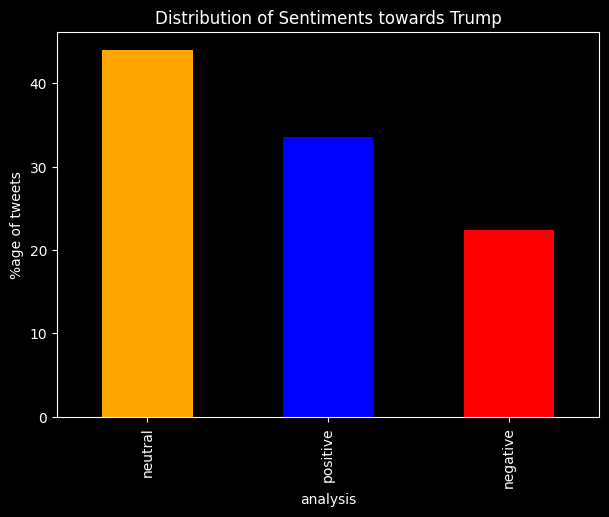

In [44]:
# how much data is positive/negetive/neutral 
plt.style.use('dark_background') # Adding black theme 

# Define colors for each bar 
colors = ['orange', 'blue', 'red'] 

plt.figure(figsize=(7, 5)) 
(trump_tweets.analysis.value_counts(normalize=True) * 100).plot.bar(color=colors) 
plt.ylabel("%age of tweets") 
plt.title("Distribution of Sentiments towards Trump") 
plt.show() 

Plotting Word Cloud to quickly identify the most important themes or topics in the text and understand the overall sentiment or tone of the tweets.

In [45]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

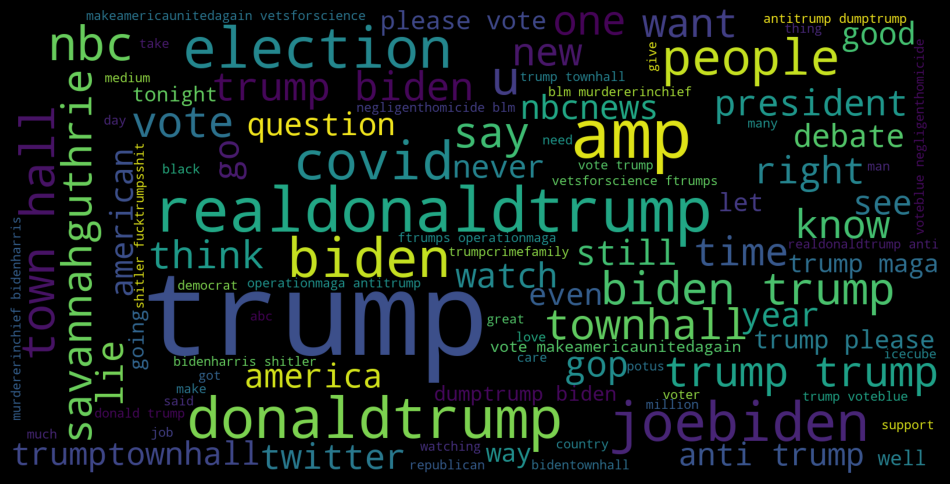

In [46]:
def word_cloud(wd_list): 
	stopwords = set(STOPWORDS) 
	all_words = ' '.join([text for text in wd_list]) 
	wordcloud = WordCloud(background_color='black', 
						stopwords=stopwords, 
						width=1600, height=800, max_words=100, max_font_size=200, 
						colormap="viridis").generate(all_words) 
	plt.figure(figsize=(12, 10)) 
	plt.axis('off') 
	plt.imshow(wordcloud) 

word_cloud(trump_tweets['cleantext'][:5000]) 


### Joe Biden's Sentiment Analysis ###

In [47]:
biden_tweets = data[data['candidate'] == 'biden'] 
biden_tweets = biden_tweets.loc[biden_tweets.country == 'US'] 
biden_tweets = biden_tweets[['tweet']] 
biden_tweets

,tweet
6,"In 2020, #NYPost is being #censorship #CENSORE..."
17,"Comments on this? ""Do Democrats Understand how..."
25,@RealJamesWoods #BidenCrimeFamily #JoeBiden #H...
29,Come on @ABC PLEASE DO THE RIGHT THING. Move t...
34,#realDonaldTrump addresses #JoeBiden and #Hunt...
...,...
776836,"#Biden 🗽🇺🇸👍🏽 | Images 📷 @ Santa Maria, CA. | ..."
776845,Will #criticalRaceTheory become ubiquitous in ...
776847,You moving near #Biden 🤔 https://t.co/1F6i1YIJ2P
776861,#election #2020Elections #trump #biden https:/...


In [48]:
biden_tweets['cleantext']=biden_tweets['tweet'].apply(clean) 
biden_tweets.head()

,tweet,cleantext
6,"In 2020, #NYPost is being #censorship #CENSORE...",nypost censorship censored twitter manipulate ...
17,"Comments on this? ""Do Democrats Understand how...",comment democrat understand ruthless china chi...
25,@RealJamesWoods #BidenCrimeFamily #JoeBiden #H...,realjameswoods bidencrimefamily joebiden hunte...
29,Come on @ABC PLEASE DO THE RIGHT THING. Move t...,come abc please right thing move biden town ha...
34,#realDonaldTrump addresses #JoeBiden and #Hunt...,realdonaldtrump address joebiden hunterbiden c...


In [49]:
# how much data is positive/negetive/neutral 
plt.style.use('dark_background') 

# Define colors for each bar 
colors = ['orange', 'green', 'red'] 

plt.figure(figsize=(7, 5)) 
(biden_tweets.analysis.value_counts(normalize=True) * 100).plot.bar(color=colors) 
plt.ylabel("%age of tweets") 
plt.title("Distribution of Sentiments towards Biden") 
plt.show() 

AttributeError: 'DataFrame' object has no attribute 'analysis'

<Figure size 700x500 with 0 Axes>

In [ ]:
word_cloud(biden_tweets['cleantext'][:5000])

### Sentiment Analysis Prediction ###

Analyze the sentiments to predict the results for Donald Trump

In [ ]:
trump_tweets.analysis.value_counts(normalize=True)*100

Analyze the sentiments to predict the results for Joe Biden

In [ ]:
biden_tweets.analysis.value_counts(normalize=True)*100

**Conclusion:** let’s analyze what each sentiment’s percentage represents and its implications on the result.

**Positive Sentiment:** Positive tweets about Biden outnumber positive tweets about Trump: Biden’s tweets have a higher percentage of positive feelings (37.93%) than Trump’s ( 33.62%). This shows that Twitter users are responding more favorably to Biden.

**Neutral Sentiment:** Trump receives more neutral sentiments: In contrast, Trump receives slightly more neutral sentiments (44.15%) in comparison to Biden (46.95%) in his tweets. This may indicate that Trump’s tweets are more likely to be seen as neutral or impersonal, leading to a higher neutral sentiment rate.

**Negative Sentiment:** Trump gets more unfavorable reactions: While both candidates have received criticism, Trump’s tweets have a greater percentage of unfavorable reactions ( 22.21%) than Biden’s (15.11%). This implies that there may have been more opposition to Trump’s tweets on Twitter.

With respect to the U.S. voters, it was highlighted a lot of times that Trump was the most talked about and tweeted about among people however, Trump has received more negative comments as compared to Joe Biden. As a result, Joe Biden won the 2020 elections which is a proven fact. However, overall, the competition was close as shown by the data.